## StackOverflow 2017 Survery Analysis

In this notebook I am going to gather the data, assess it, clean it and analyze it. Since the output of this project is to write a blog post that is explainable to the non technical I will not be creating a model.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [13]:
# the following code was taken from https://gist.github.com/jlln/338b4b0b55bd6984f883.
# It splits multiple values in a column and appends it as its own row with all the other row data intact.
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [14]:
# create dataframe of survey results
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# look at shape of dataframe
df.shape

(51392, 154)

In [16]:
# Take a look at the questions with numeric responses
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [128]:
null_values = df.isna()
null_values = null_values.describe()
print(null_values.head())
null_values.loc['freq'].sort_values()/df.shape[0]

       Respondent Professional ProgramHobby Country University  \
count       51392        51392        51392   51392      51392   
unique          1            1            1       1          1   
top         False        False        False   False      False   
freq        51392        51392        51392   51392      51392   

       EmploymentStatus FormalEducation MajorUndergrad HomeRemote CompanySize  \
count             51392           51392          51392      51392       51392   
unique                1               1              2          2           2   
top               False           False          False      False       False   
freq              51392           51392          42841      44008       38922   

            ...       StackOverflowMakeMoney Gender HighestEducationParents  \
count       ...                        51392  51392                   51392   
unique      ...                            2      2                       2   
top         ...           

Methodology                         0.501459
MetricAssess                        0.504359
WantWorkDatabase                    0.511422
JobProfile                          0.519011
SelfTaughtTypes                     0.520217
LearnedHiring                       0.538119
CousinEducation                     0.541407
WantWorkPlatform                    0.542575
EducationImportant                  0.545552
WantWorkFramework                   0.546019
ImportantHiringGettingThingsDone    0.555437
ImportantHiringTitles               0.555592
ImportantHiringCompanies            0.555592
ImportantHiringOpenSource           0.556429
ImportantHiringPMExp                0.556838
ImportantHiringRep                  0.556857
ImportantHiringCommunication        0.557266
ImportantHiringAlgorithms           0.557324
ImportantHiringEducation            0.557733
ImportantHiringTechExp              0.558336
ResumePrompted                      0.562948
HaveWorkedPlatform                  0.566508
AssessJobT

It looks like the column with the most NaN values is Methodology at ~50% NaNs. 

In [17]:
# how many countries are represented in the survey
df['Country'].value_counts().count()

201

### Explore the data

My initial curiosity was in the survey question about wanting to change the world. 


In [18]:
# How many respondents left the question null
df['ChangeWorld'].isnull().value_counts()

False    30935
True     20457
Name: ChangeWorld, dtype: int64

In [19]:
# How many respondents answered in each way?
df['ChangeWorld'].value_counts()/30935


Agree                0.297139
Somewhat agree       0.292872
Strongly agree       0.233910
Disagree             0.143721
Strongly disagree    0.032358
Name: ChangeWorld, dtype: float64

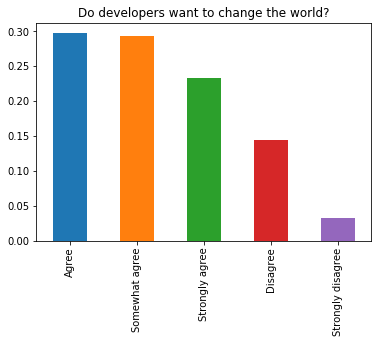

In [20]:
# Graph the results
overpaid_vals = df['ChangeWorld'].value_counts()

(overpaid_vals/30935).plot(kind="bar");
plt.title("Do developers want to change the world?");

The majority of respondents want to change the world. With around 52% agreeing or stronly agreeing with the statement I want to change the world.

My next area of curiosity was around which languages are worked in most.

In [21]:
# How many null values for this survey question?
df['HaveWorkedLanguage'].isnull().value_counts()

False    36625
True     14767
Name: HaveWorkedLanguage, dtype: int64

14767 non responses for languages worked in question.

In [22]:
# Create a dataframe for just languages containing respondent and haveworked language
# so that I can split the values since many respondents have multiple selections
df_languages = df[['Respondent', 'HaveWorkedLanguage']]
df_languages = df_languages.dropna()
df_languages.head()

,Respondent,HaveWorkedLanguage
0,1,Swift
1,2,JavaScript; Python; Ruby; SQL
2,3,Java; PHP; Python
3,4,Matlab; Python; R; SQL
5,6,JavaScript; PHP; Rust


In [23]:
# Split up the responses into their own rows while maintaining the respondent id
languages = splitDataFrameList(df_languages, 'HaveWorkedLanguage', "; ")

In [25]:
# Create the percent of each language the respondents have worked in extensively over the past year
lang_percent = languages['HaveWorkedLanguage'].value_counts()/languages.shape[0]

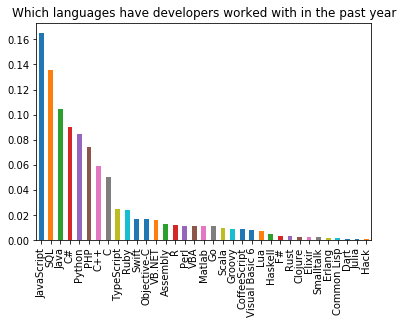

In [26]:
# Plot the results
lang_percent.plot(kind="bar");
plt.title("Which languages have developers worked with in the past year");

The top 5 languages worked in by respondents in order are: Javascript, SQL, Java, C#, and Python.

In [28]:
# Create a dataframe for which languages they want to work with
df_languages_to_learn = df[['Respondent', 'WantWorkLanguage']]
df_languages_to_learn = df_languages_to_learn.dropna()
df_languages_to_learn.head()

,Respondent,WantWorkLanguage
0,1,Swift
1,2,Java; Python; Ruby; SQL
2,3,C; Python; Rust
3,4,Matlab; Python; R; SQL
5,6,Clojure; Elixir; Erlang; Haskell; Rust; TypeSc...


In [29]:
# Will have to split the reponses into their own row in order to figure out 
# which languages respondents want to work in .
languages_to_learn = splitDataFrameList(df_languages_to_learn, 'WantWorkLanguage', "; ")

In [30]:
# Get the percent per language
to_learn_percent = languages_to_learn['WantWorkLanguage'].value_counts()/languages_to_learn.shape[0]

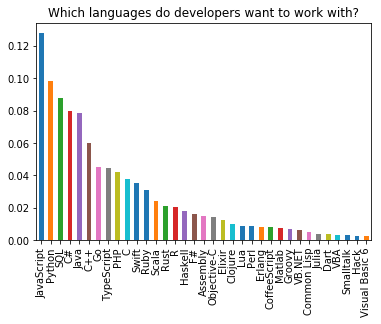

In [31]:
#Plot the language percent values
to_learn_percent.plot(kind="bar");
plt.title("Which languages do developers want to work with?");

The top 5 languages respondents want to work with in priority order are:
    Javascript, Python, SQL, C# and Java.
    
These are the same languages we saw before but in a slightly different order.

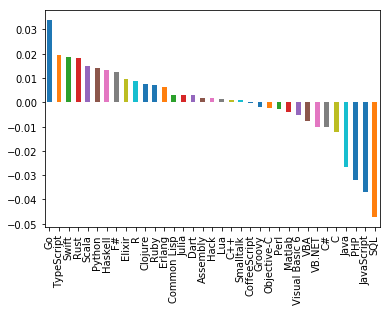

In [504]:
# What are teh difference between languages learn and languages currently working with?
lang_difference = to_learn_percent - lang_percent
lang_difference = lang_difference.sort_values(ascending=False)
lang_difference.plot(kind='bar')

There are not too much difference between the languages respondents work with and want to work with.
Obviously the top five will have the largest change since the majority of repondents already work in those languages.

#### How many languages are worked in extensively by the respondents?

In [23]:
# Create value_counts for how many languages are worked in by repondents
how_many_langs = (languages.groupby('Respondent').count())['HaveWorkedLanguage'].value_counts()

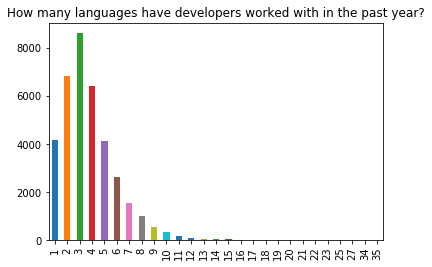

In [362]:
# Plot the results
how_many_langs.sort_index().plot(kind="bar");
plt.title("How many languages have developers worked with in the past year?");

In [32]:
# function to clean the data by removing NaN values, create percent of value coutns and return the plot
def multi_value_breakdown(df, chart_type, column, chart_title):
    # Create new dataframe for the specific column that contains multiple values in the cells
    # containing respondent and column
    df_new = df[['Respondent', column]]
    df_new = df_new.dropna()
    df_new[column].value_counts()
    
    #separate all cells that have multiple values into new rows with the respondent id
    df_new = splitDataFrameList(df_new, column, "; ")
    
    # calculate the percent of the value counts
    percent = df_new[column].value_counts()/df_new.shape[0]
    percent = percent.sort_values()
    # plot the value counts
    percent.plot(kind=chart_type);
    plt.title(chart_title);

#### What are the most popular Frameworks extensively worked with in the past year?

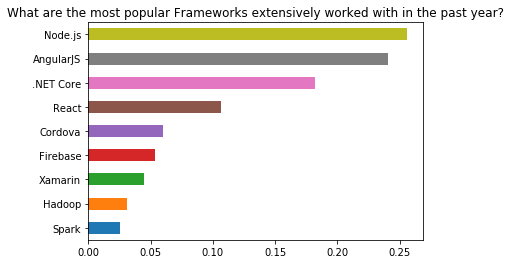

In [35]:
# Plot the percent of respondents that worked with each framework
multi_value_breakdown(df, 'barh','HaveWorkedFramework', 
                      'What are the most popular Frameworks extensively worked with in the past year?')

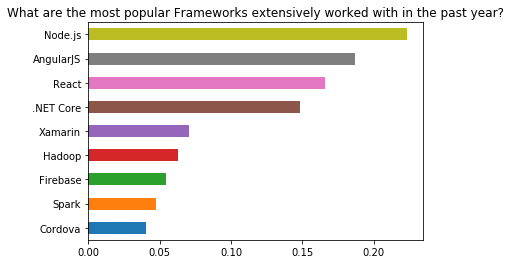

In [36]:
# Plot the percent of respondents that want to work with each framework
multi_value_breakdown(df, 'barh', 'WantWorkFramework', 
                      'What are the most popular Frameworks extensively worked with in the past year?')

The top four frameworks are the same for both questions. This leads me to believe that those will remain the top frameworks for at least a couple of years.

#### What are the most popular Databases extensively worked with in the past year?

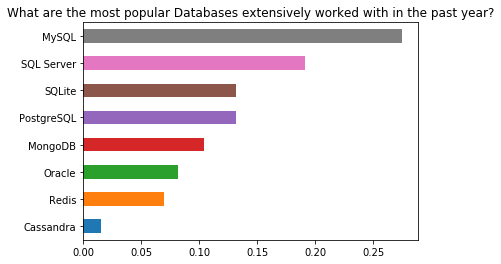

In [382]:
# Plot which databases have been worked with in the past year.
multi_value_breakdown(df, 'barh', 'HaveWorkedDatabase', 
                     'What are the most popular Databases extensively worked with in the past year?')

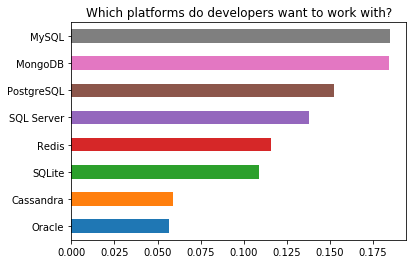

In [37]:
# Plot which databases that want to be worked with in the past year.
multi_value_breakdown(df, 'barh', 'WantWorkDatabase', 
                     'Which platforms do developers want to work with?')

MongoDB jumps into the top 4 databases that want to be worked in. MySQL is the most popular Database worked in or want to be worked in.

#### What are the most popular platforms extensively worked with in the past year?

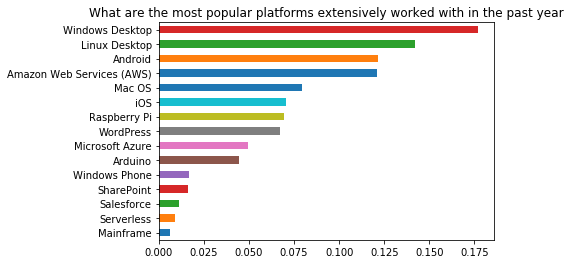

In [384]:
multi_value_breakdown(df, 'barh','HaveWorkedPlatform', 
                     'What are the most popular platforms extensively worked with in the past year')

#### Which platforms do developers want to work with?

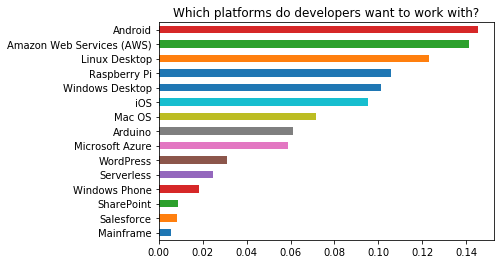

In [385]:
multi_value_breakdown(df,'barh', 'WantWorkPlatform', 
                     'Which platforms do developers want to work with?')

Windows desktop is the most populat platform worked in with Linux, Android, and AWS close behind. Android and AWS lead the way with platforms want to be worked on.


#### What types of developers are the respondents of the survey?

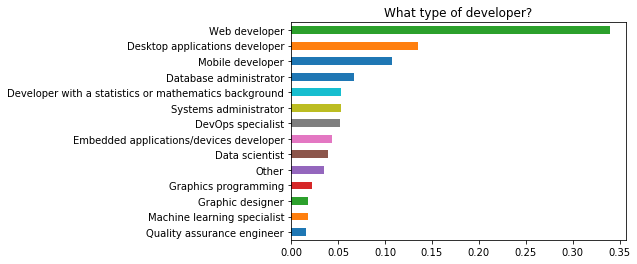

In [39]:
# Plot the counts of the types of developers?
multi_value_breakdown(df,'barh', 'DeveloperType', 
                     'What type of developer?')

The majority of resondents are Web developers at around 34% which is aboutn 20% greater than any other response.

#### What is the most popular work start time for developers?


In [42]:
# Create a dataframe for work start time and drop null values
workstart = df['WorkStart'].dropna()
workstart.head(10)

0      6:00 AM
1     10:00 AM
2      9:00 AM
3      9:00 AM
5     10:00 AM
6      7:00 AM
7         Noon
8      9:00 AM
9     10:00 AM
10     6:00 AM
Name: WorkStart, dtype: object

Looks like there are some strings in the data "noon" and "midnight". I will have to convert those.
I will also need to convert to military time in order to plot this correctly.

In [43]:
military_time = []
for i in workstart:
    if i == 'Noon':
        military_time.append('12:00 PM')
    elif i == 'Midnight':
        military_time.append('12:00 AM')
    else:
        military_time.append(i)
        

In [44]:
# Create a dataframe from the above conversion
military_time = pd.DataFrame(military_time)


In [45]:
# rename the column in the dataframe from 0 to workstart
military_time = military_time.rename(columns={0: "workstart"})

In [46]:
# Convert to military time
timedate = []
for i in military_time['workstart']:
    i = datetime.strptime(i, '%I:%M %p')
    timedate.append(i)

In [47]:
# create df of the timedate list above
timedate = pd.DataFrame(timedate)


In [49]:
# Create list of hours and convert it to a dataframe
hours = []
timedate = timedate.rename(columns={0: "workstart"})
for i in timedate['workstart']:
    i = i.hour
    hours.append(i)
hours = pd.DataFrame(hours)  
hours = hours.rename(columns={0: "workstart"})
hours.shape

(36696, 1)

Text(0.5,0,'Hour (Military Time)')

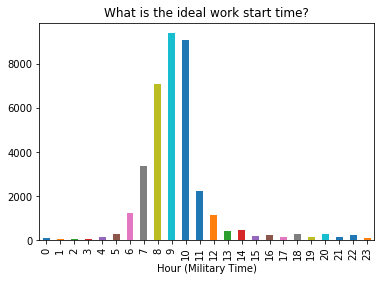

In [51]:
# Plot the counts for the hours when the respondents want to get to work
hours['workstart'].value_counts().sort_index().plot(kind='bar');
plt.title("What is the ideal work start time?");
plt.xlabel("Hour (Military Time)")

This looks like a normal but slightly right skewed distribution. Majority of respondents want to start work between 8 and 10 AM.

### What is important to look for in a candidate during the hiring process?

The question the piqued the most curiousity in me was around what qualities are most important in a candidate. There are a couple interesting ways to cut this data; compairing student to professional developer and compairing professional programmers with a couple of years of experience to professional programmers with many years of experience. 

In [55]:
# Begin looking at the make up of this set of survey questions
test = df['ImportantHiringAlgorithms'].value_counts()

In [57]:
# Likert scale questions
test

Important               11852
Somewhat important       7890
Very important           6463
Not very important       2093
Not at all important      344
Name: ImportantHiringAlgorithms, dtype: int64

In [58]:
# Create function that takes a list of questions and gets the value counts and plots the value counts
def count_question(questions):
    for q in questions:
        df[q].value_counts().plot(kind='bar', title=(q[15:]))
        print(q[15:], '\n', df[q].value_counts(), '\n')

In [59]:
test.loc['Important']

11852

In [60]:
# Load the survey results schema to map question text to the survery results label
df_schema = pd.read_csv('survey_results_schema.csv')

In [61]:
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [62]:
# Make the column the index to better identify the question using loc
df_schema.set_index('Column', inplace=True)


In [63]:
# Figure out which text to remove, to remove the question and only include the category
len("Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process?")

375

In [64]:
# Test to make sure it is getting only the category/quality name
label = df_schema.loc['ImportantHiringAlgorithms'].Question
label[375:]

' Knowledge of algorithms and data structures'

In [65]:
# Create function to get the values for importance and not importance counts
def sum_answers(df, df_schema, questions):
    importance_counts = {}
    importance_percents = {}
    
    #create the dataframe for the question list
    df = df[questions]
    #remove any column with missing values
    df = df.dropna(axis=0, how='all')
    #get value counts for each question, get count that are important and not important, not counting
    # somewhat important as I will treat that as a neutral response
    for q in questions:
        values = df[q].value_counts()
        imp = (values.loc["Important"] + values.loc["Very important"])
        notimp = (values.loc["Not very important"] + values.loc["Not at all important"])
        label = df_schema.loc[q].Question
        label = label[375:]
        importance_counts[label] = imp - notimp
        importance_percents[label] = imp/df.shape[0]
    return importance_counts, importance_percents
                

In [66]:
# Create the list of questions to feed into the functions
questions = ['ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 
             'ImportantHiringOpenSource','ImportantHiringPMExp', 'ImportantHiringCompanies',
             'ImportantHiringTitles', 'ImportantHiringEducation', 'ImportantHiringRep', 
             'ImportantHiringGettingThingsDone']

In [67]:
# Create function to create dataframes of the results of sum answers
def importance_df(df, df_schema, questions):
    # get counts and percents for importance of a dataframe of specific questions
    importance_counts, importance_percents = sum_answers(df, df_schema, questions) 
    
    # Create data frame importance from importance count dictionary
    Importance = pd.DataFrame.from_dict(importance_counts, orient='index')
    
    # Rename column to importance
    Importance = Importance.rename(columns={0: "Importance"})
    
    # create dataframe of percents to join to other dataframe
    importance_percents = pd.DataFrame.from_dict(importance_percents, orient='index')
    
    #join to Importance dataframe
    Importance = Importance.join(importance_percents)
    
    #Rename column
    Importance = Importance.rename(columns={0: "Percentage_of_respondents"})
    
    # sorty dataframe by importance
    Importance = Importance.sort_values(by="Importance")
    
    # create a column that contains info on whether Importance is positive or negative
    Importance['Positive'] = Importance['Importance'] > 0
    
    return Importance

In [68]:
# Plot the importance of each hiring category which is the 
# sum of (Importand + Very Important) - (Not very important + Not at all important)
def plot_count(df, title, label):
    df['Importance'].plot(kind='barh', color=Importance['Positive'].map({True: 'G', False: 'r'}))
    plt.title(title);
    plt.xlabel(label);

In [69]:
# Plot percentage of respondents who think the following categories
# are important or very important to consider when hiring
def plot_percent(df, title, label):
    df['Percentage_of_respondents'].plot(kind='barh')
    plt.title(title);
    plt.xlabel(label);

In [78]:
# Create dataframe for with the results of the importance_df function to plot category importance
Importance = importance_df(df, df_schema, questions)

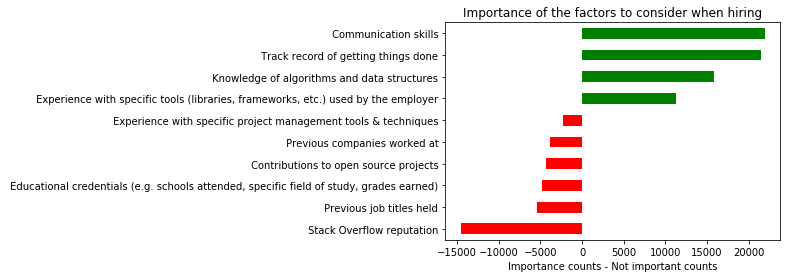

In [79]:
plot_count(Importance, "Importance of the factors to consider when hiring", 
           "Importance counts - Not important counts")

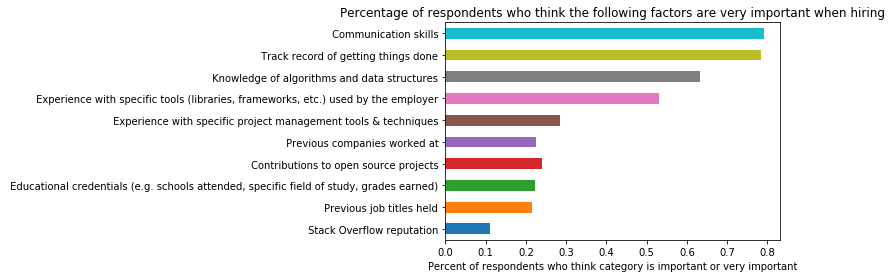

In [80]:
plot_percent(Importance, "Percentage of respondents who think the following factors are very important when hiring", 
             "Percent of respondents who think category is important or very important")

It looks like there is a clear distance between what the majority of repondents believe is important versus un important. The four traits that are important in order are Communication skills, track record of getting things done, knowledge of algorithms and data structures, and experience with specific tools used by the employer.

In [81]:
#### How does this differ whether the respondent is a student or professional developer?

In [82]:
# Create new dataframe of questions plus professional and country columns
df_profession = df[['Professional', 'Country','ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 
             'ImportantHiringOpenSource','ImportantHiringPMExp', 'ImportantHiringCompanies',
             'ImportantHiringTitles', 'ImportantHiringEducation', 'ImportantHiringRep', 
             'ImportantHiringGettingThingsDone']]


(51392, 12)


In [83]:
# Clean dataframe and add if country have more than 300 responses
df_profession = df_profession.dropna()
df_profession['over_300_responses'] = df_profession.Country.value_counts()>300

# How many rows remain?
print(df_profession.shape)

(27170, 13)


In [84]:
# Create dataframes for developer and student so that I can layer them in a plot

df_developer = df_profession.loc[df['Professional'].isin(["Professional developer",
                                                          "Used to be a professional developer"])]
df_student = df_profession.query('Professional == "Student"')

Professional developer                                  0.738866
Student                                                 0.130180
Professional non-developer who sometimes writes code    0.095473
Used to be a professional developer                     0.019433
None of these                                           0.016047
Name: Professional, dtype: float64

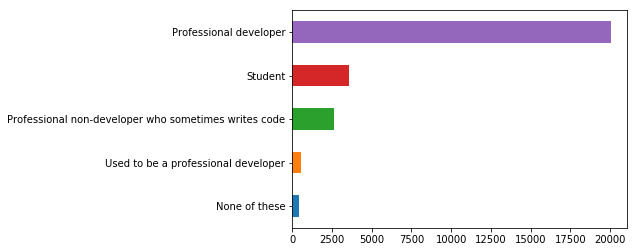

In [90]:
# plot the counts per category and get the percentage total for each category
df_profession.Professional.value_counts().sort_values().plot(kind='barh')
df_profession.Professional.value_counts()/27170


74% of are professional developers while 13% are students.


In [91]:
# Create importance dataframes for developers and students
df_developers_importance = importance_df(df_developer, df_schema, questions)
df_student_importance = importance_df(df_student, df_schema, questions)

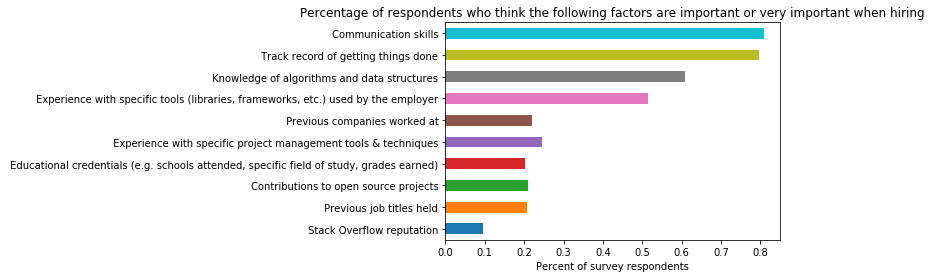

In [97]:
# Plot importance for developers
plot_percent(df_developers_importance, 
             "Percentage of respondents who think the following factors are important or very important when hiring",
            "Percent of survey respondents")

In [98]:
# Rename student importance df columns and join them to deverlopers importance df to 
# create a joint dataframe to use to plot both values
df_student_importance = df_student_importance.rename(columns={"Importance": "Student_Importance", 
                                      "Percentage_of_respondents": "Student_Percentage_of_respondents", 
                                      "Positive": "Student_Positive"})
devs_and_students_df = df_developers_importance.join(df_student_importance)
devs_and_students_df['student_percent_difference'] = devs_and_students_df['Student_Percentage_of_respondents'] - devs_and_students_df['Percentage_of_respondents']

In [99]:
# Make sure the join worked
devs_and_students_df.head()

,Importance,Percentage_of_respondents,Positive,Student_Importance,Student_Percentage_of_respondents,Student_Positive,student_percent_difference
Stack Overflow reputation,-11473,0.094743,False,-1296,0.165677,False,0.070934
Previous job titles held,-4445,0.206086,False,-251,0.264066,False,0.057979
Contributions to open source projects,-4439,0.210795,False,341,0.368674,True,0.157879
"Educational credentials (e.g. schools attended, specific field of study, grades earned)",-4278,0.203029,False,51,0.325417,True,0.122388
Experience with specific project management tools & techniques,-3370,0.245984,False,934,0.463387,True,0.217403


/Users/mricksen/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


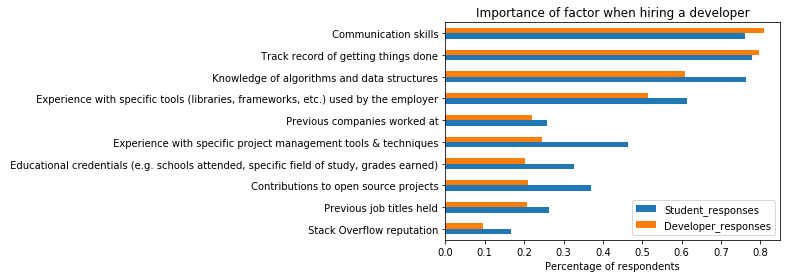

In [100]:
# create a new dataframe of the percent respondents and rename columns so the legend contains the correct labels
percent_respondents = devs_and_students_df[['Percentage_of_respondents', 'Student_Percentage_of_respondents']]
percent_respondents = percent_respondents.rename(columns={'Percentage_of_respondents': 'Developer_responses',
                                                         'Student_Percentage_of_respondents': 'Student_responses'})
percent_respondents.plot(y=['Student_responses', 'Developer_responses'],
                          kind="barh");
plt.title('Importance of factor when hiring a developer');
plt.xlabel("Percentage of respondents");

Students think the majority of categories, except the two most important categories, are more important than the professional developers when hiring a candidate.

Text(0.5,0,'Percent different')

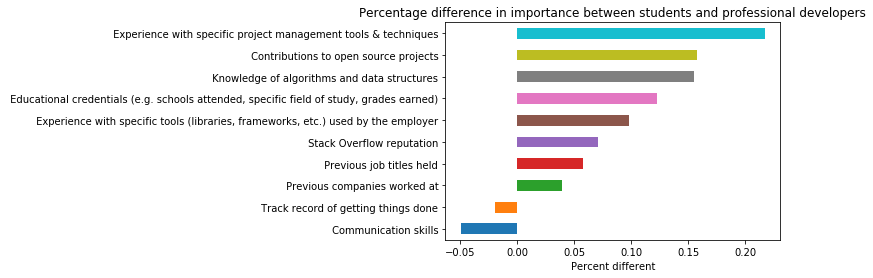

In [133]:
# Plot the percentage differences for each category between students and developers 
# student % - developer %
devs_and_students_df['student_percent_difference'].sort_values().plot(kind='barh')
plt.title('Percentage difference in importance between students and professional developers')
plt.xlabel('Percent different')

This chart shows how different the students responses were than the developers.

#### How does the number of years as a developer change the responses to what is most important?

In [135]:
# Include Years codedjob to a new dataframe (Im doing this because the null values differs across columns)
df_dev_years = df[['Respondent', 'Professional', 'YearsCodedJob','ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 
             'ImportantHiringOpenSource','ImportantHiringPMExp', 'ImportantHiringCompanies',
             'ImportantHiringTitles', 'ImportantHiringEducation', 'ImportantHiringRep', 
             'ImportantHiringGettingThingsDone']]
print(df_dev_years.shape)

(51392, 13)


In [138]:
# Clean dev years dataframe by dropping NaNs and see how many rows remain
df_dev_years = df_dev_years.dropna()
df_dev_years.shape

(22552, 13)

In [140]:
# Figure out the percentage for each number of dev years
dev_years = df_dev_years.YearsCodedJob.value_counts()/df_dev_years.shape[0]

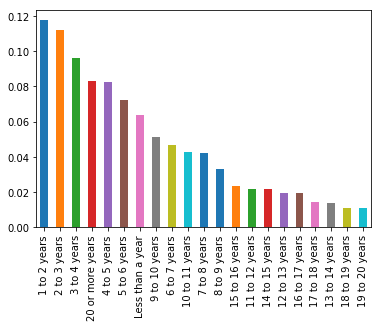

In [141]:
#Plot the results of the percentage of each response
dev_years.plot(kind='bar')

In [144]:
# Create a column to determine which values are less than 5 years experience
df_dev_years['lessthan5years'] = df_dev_years.YearsCodedJob.isin(['Less than a year', 
                                                                      '1 to 2 years', '2 to 3 years', 
                                                                      '3 to 4 years', '4 to 5 years'])

In [145]:

dev_years_lessthan_5 = df_dev_years.query('lessthan5years == True')
dev_years_5_plus = df_dev_years.query('lessthan5years == False')

In [156]:
more_than_5_years = importance_df(dev_years_5_plus, df_schema, questions)

In [157]:

less_than_5_years = importance_df(dev_years_lessthan_5, df_schema, questions)

In [158]:
more_than_5_years = more_than_5_years.rename(columns={"Importance": "Importance_working_more_than_5_years", 
                                      "Percentage_of_respondents": "Percentage_of_respondents_more_than_5", 
                                      "Positive": "More_than_5_positive"})
more_than_5_years = less_than_5_years.join(more_than_5_years)

more_than_5_years['difference'] = more_than_5_years['Percentage_of_respondents'] - more_than_5_years['Percentage_of_respondents_more_than_5']



/Users/mricksen/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


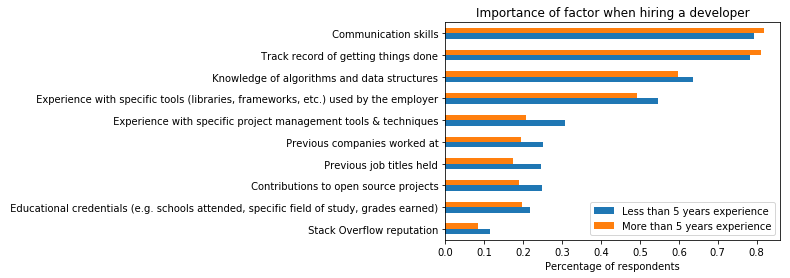

In [154]:
# create a new dataframe of the percent respondents and rename columns so the legend contains the correct labels
years_difference = more_than_5_years[['Percentage_of_respondents', 'Percentage_of_respondents_more_than_5']]
years_difference = years_difference.rename(columns={'Percentage_of_respondents': 'Less than 5 years experience',
                                                         'Percentage_of_respondents_more_than_5': 'More than 5 years experience'})
years_difference.plot(y=['Less than 5 years experience', 'More than 5 years experience'],
                          kind="barh");
plt.title('Importance of factor when hiring a developer');
plt.xlabel("Percentage of respondents");

Text(0.5,0,'Percent difference')

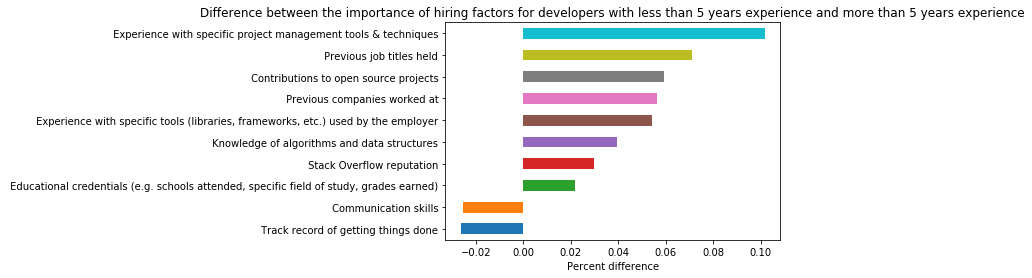

In [162]:
more_than_5_years['difference'].sort_values().plot(kind='barh')
plt.title('Difference between the importance of hiring factors for developers with less than 5 years experience and more than 5 years experience')
plt.xlabel('Percent difference')

These differences look similar to the student differnces but about half of the student percent differences. I wonder if either the importance is changing amongst the younger deverlopers or aspiring developers or whether experience changes what is important to a developer.

In [487]:
web_developer = df_dev_type.query('DeveloperType == "Web developer"')
web_developer.shape

(14755, 13)

In [505]:
web_developer = importance_df(web_developer, df_schema, questions)

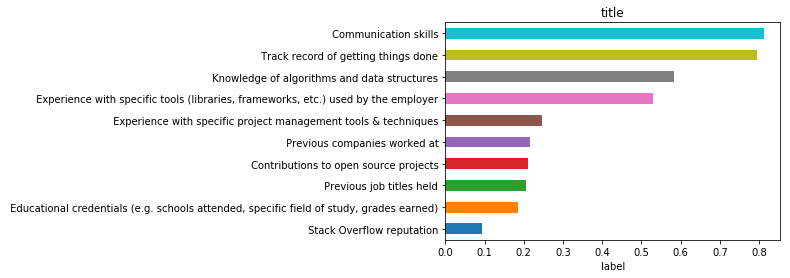

In [506]:
plot_percent(web_developer, 'title', 'label')

In [ ]:
Example in statement
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Doctoral", "Professional degree"): 
        return 1
    else:
        return 0
df["FormalEducation"].apply(higher_ed)[:5]